# Энергия ферромагнетика (2D)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать среднюю энергию $\langle E \rangle$ для указанной цепочки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1, 1.1, ..., 5.0]$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
где 
$$Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$$ 
статистическая сумма, $$\beta = \frac{1}{k T}-$$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Средняя энергия для $L_x=4$ при температурах $kT \in [1, 1.1, ..., 5.0]$:

```
[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]
```


**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [32]:
import numpy as np

import math
from tqdm.notebook import trange
from time import time
from numba import jit,njit, cuda
import datetime
import matplotlib.pyplot as plt

In [2]:
Lx = np.asarray([2, 3, 4, 5, 6, 7, 8])
kT_list = np.asarray(list(range(10, 51, 1)))/ 10

In [4]:
@njit()
def shange_spin_list(spin): 
    '''
    Возвращает уникальный массив, состоящий из 1 и -1.
    
            Параметры:
                    spin (numpy.ndarray): numpy массив, состоящий из состоящий из 1 и -1
                    
            Возвращаемое значение:
                    spin (numpy.ndarray): numpy массив, состоящий из состоящий из 1 и -1, 
                                            полученный на основе массива, переданного в функцию
    '''
    for i in range(len(spin)):
        if spin[i] == -1:
            spin[i] = 1
        else:
            spin[i] = -1 
            break
    return spin

@njit()
def sum_energy(spin, spin_len):
    '''
    Возвращает энергию системы двумерной решетки при нулевом внешнем магнитном.
    
            Параметры:
                    spin (numpy.ndarray): numpy массив, состоящий из состоящий из 1 и -1
                    spin_len (int): длина массива spin
            Возвращаемое значение:
                    energy_sum (int): энергию системы двумерной решетки
    '''
    j = 1
    y = 4
    energy_sum = 0
    for i in range(spin_len):
        if i >= j * y:
            j+=1

        energy_sum += spin[i] * spin[i + 1 if i + 1 < y*j else i + 1 - y] + spin[i] * spin[i + y if i + 4 < spin_len else i - y*(j-1)]
        
    return energy_sum * (-1)

In [5]:
@njit(parallel=True)
def find_mean_energy_jit(i_Lx, kT):  
    '''
    Возвращает массив средних энергий двумерной решетки для каждого значения температуры
            Параметры:
                    i_Lx (int): размер решетки по оси Х
                    kT (numpy.ndarray): массив, содержащий все значения температуры, умноженной на константу Больцмана
            Возвращаемое значение:
                    binary_sum (numpy.ndarray): массив средних энергий двумерной решетки для разных температур
    '''
    
    N = 2 ** (i_Lx * 4)
    spin_list = np.ones(i_Lx * 4) 
    spin_len = len(spin_list)

    mean_energy_list = np.zeros(len(kT))
    
    for i_kT in range(len(kT)):
  
        KT = kT_list[i_kT]
        
        B = 1 / KT
        energy = 0
        mean_energy = 0
        Z = 0
        
        
    
        
        for i in range(N):
            spin_list = shange_spin_list(spin_list)
            energy = sum_energy(spin_list, spin_len)

            Z += np.e ** ((-1) * B * energy)

            mean_energy += energy * np.e ** ((-1) * energy * B)
     
        
        mean_energy_list[i_kT] = mean_energy /(Z * i_Lx * 4)
        
    return mean_energy_list    

In [5]:
n = len(Lx)
mean_energy_list = []
times = []
print("Current time:", datetime.datetime.now(), "\n")
for i in trange(n):
    lx = Lx[i]
    t = time()
                
    mean_energy = find_mean_energy_jit(lx, kT_list)
    times.append(time()-t)
                
    print("Lx:", lx)
    print("time:", times[-1])
    print("mean energy:",mean_energy)
    print("Current time:", datetime.datetime.now(), "\n")
                
    mean_energy_list.append(mean_energy)
    np.save('all_normal_mean_energy',np.asarray(mean_energy_list))
    

Current time: 2022-11-09 19:52:02.864392 



  0%|          | 0/7 [00:00<?, ?it/s]

Lx: 2
time: 0.8080017566680908
mean energy: [-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
 -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
 -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
 -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
 -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
 -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
 -0.71399168 -0.69642337 -0.67970548 -0.66378023 -0.64859447]
Current time: 2022-11-09 19:52:03.689394 

Lx: 3
time: 0.007998466491699219
mean energy: [-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
 -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
 -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
 -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
 -0.88450084 -0.84416295 -0.80696158 -0.77263715 -0.7409381  -0.71162671
 -0

In [4]:
arr = np.load('all_normal_mean_energy.npy')
arr

array([[-1.99509474, -1.98967862, -1.98074878, -1.96731117, -1.94851445,
        -1.92375828, -1.89277291, -1.85565639, -1.81286316, -1.76514762,
        -1.71347563, -1.65892227, -1.60257405, -1.5454491 , -1.48844224,
        -1.43229537, -1.3775895 , -1.3247523 , -1.27407538, -1.22573609,
        -1.17982015, -1.13634286, -1.09526756, -1.05652101, -1.02000562,
        -0.98560898, -0.9532109 , -0.92268862, -0.89392045, -0.86678827,
        -0.84117913, -0.8169862 , -0.79410926, -0.77245486, -0.75193626,
        -0.73247322, -0.71399168, -0.69642337, -0.67970548, -0.66378023,
        -0.64859447],
       [-1.99711779, -1.99383665, -1.98825271, -1.97949351, -1.96659182,
        -1.94853206, -1.92432618, -1.89312223, -1.85433583, -1.80777902,
        -1.75375117, -1.69305981, -1.62695673, -1.55700043, -1.48487836,
        -1.41223059, -1.34050963, -1.27089443, -1.20425882, -1.14118312,
        -1.08199278, -1.02680913, -0.97560137, -0.92823315, -0.88450084,
        -0.84416295, -0.80696

In [7]:
times

[0.8080017566680908,
 0.007998466491699219,
 0.13849925994873047,
 2.152005672454834,
 37.945109128952026,
 677.5261137485504,
 14518.058559894562]

задача отключилась от ядра и вычисления слетели

In [5]:
times_last = np.asarray([0.8080017566680908,
 0.007998466491699219,
 0.13849925994873047,
 2.152005672454834,
 37.945109128952026,
 677.5261137485504,
 14518.058559894562])

In [6]:
times_last.sum() / 3600

4.232398968868785

In [50]:
import matplotlib.pyplot as plt
from matplotlib import transforms

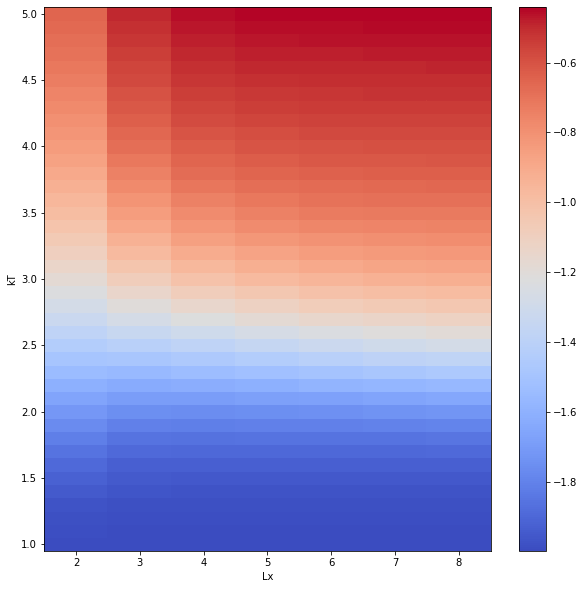

In [51]:
plt.figure(figsize=(10,10))
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(90)
plt.pcolormesh(np.linspace(1,5,41), -np.linspace(2,8,7), arr,cmap= 'coolwarm', shading='auto',transform= rot + base)
plt.xlabel("Lx")
plt.ylabel("kT")

plt.colorbar();